<a href="https://colab.research.google.com/github/Gayatri2912/22BDS0126/blob/main/22bds0126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Phase- 1
#Step 1 – Dataset Load & Basic Info
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
df = pd.read_csv(url)
# quick peek
df.head()


,rownames,state,year,miles,fatalities,seatbelt,speed65,speed70,drinkage,alcohol,income,age,enforce
0,1,AK,1983,3358,0.044669,NaN,no,no,yes,no,17973,28.234966,no
1,2,AK,1984,3589,0.037336,NaN,no,no,yes,no,18093,28.343542,no
2,3,AK,1985,3840,0.033073,NaN,no,no,yes,no,18925,28.372816,no
3,4,AK,1986,4008,0.025200,NaN,no,no,yes,no,18466,28.396652,no
4,5,AK,1987,3900,0.019487,NaN,no,no,yes,no,18021,28.453251,no


In [3]:
#Step 2 – Dimensions
print("Shape of dataset:", df.shape)


Shape of dataset: (765, 13)


In [4]:
#Step 3 – Summary Statistics
# Info about columns
df.info()

# Summary for numeric columns
df.describe()

# Summary for categorical columns
df.describe(include=['object'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    765 non-null    int64  
 1   state       765 non-null    object 
 2   year        765 non-null    int64  
 3   miles       765 non-null    int64  
 4   fatalities  765 non-null    float64
 5   seatbelt    556 non-null    float64
 6   speed65     765 non-null    object 
 7   speed70     765 non-null    object 
 8   drinkage    765 non-null    object 
 9   alcohol     765 non-null    object 
 10  income      765 non-null    int64  
 11  age         765 non-null    float64
 12  enforce     765 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 77.8+ KB


,state,speed65,speed70,drinkage,alcohol,enforce
count,765,765,765,765,765,765
unique,51,2,2,2,2,3
top,AK,yes,no,yes,no,secondary
freq,15,494,711,677,676,379


In [5]:
#Step 4 – Data Handling (Missing Values)
# Count missing values in each column
df.isnull().sum()

# Percentage of missing values
df.isnull().mean() * 100


,0
rownames,0.000000
state,0.000000
year,0.000000
miles,0.000000
fatalities,0.000000
seatbelt,27.320261
speed65,0.000000
speed70,0.000000
drinkage,0.000000
alcohol,0.000000


In [6]:
#Step 5 - Drop missing rows if any
df = df.dropna(subset=['seatbelt'])


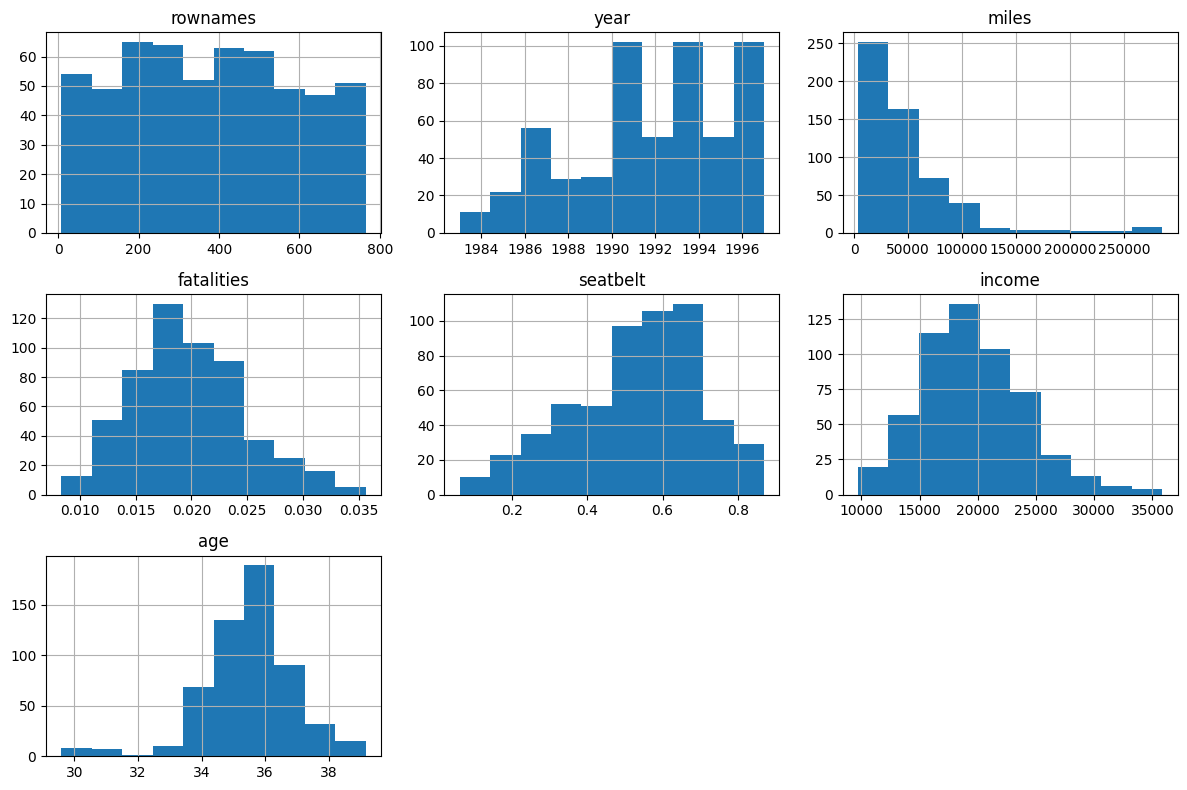

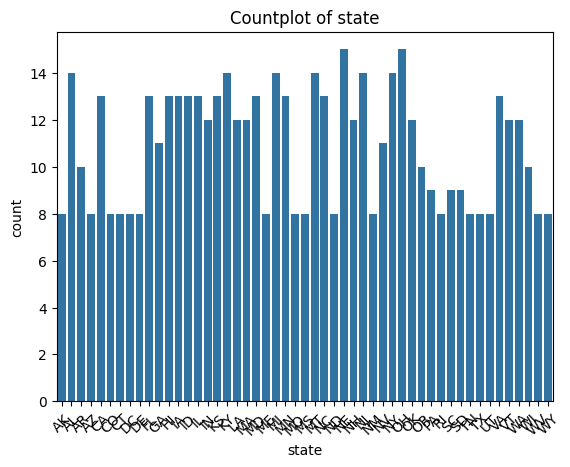

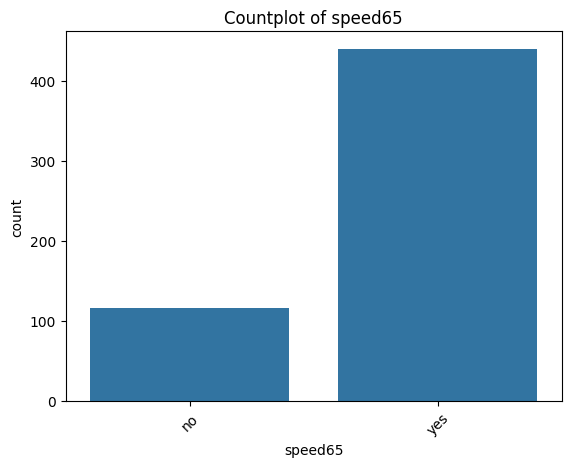

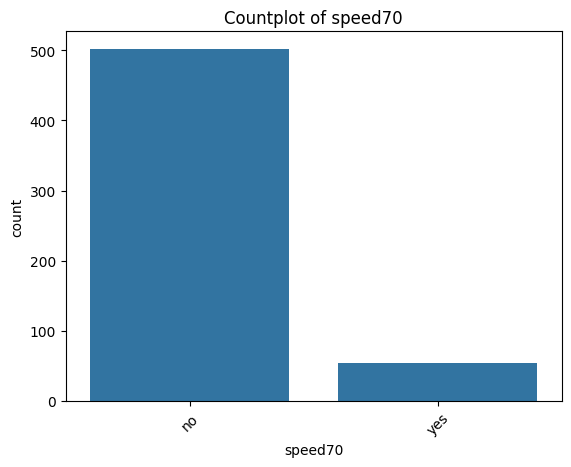

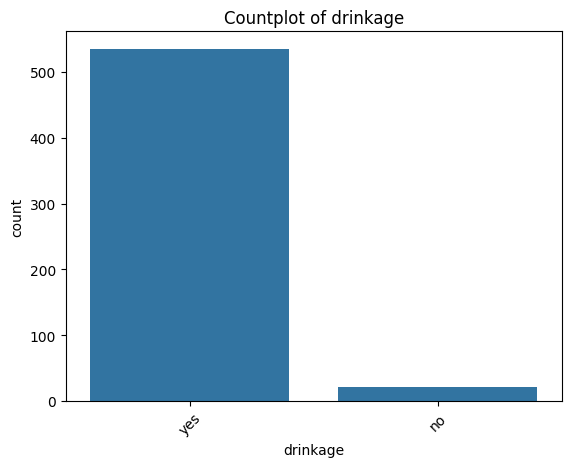

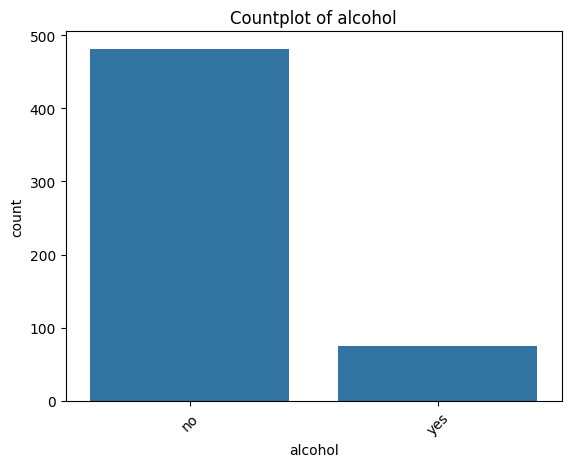

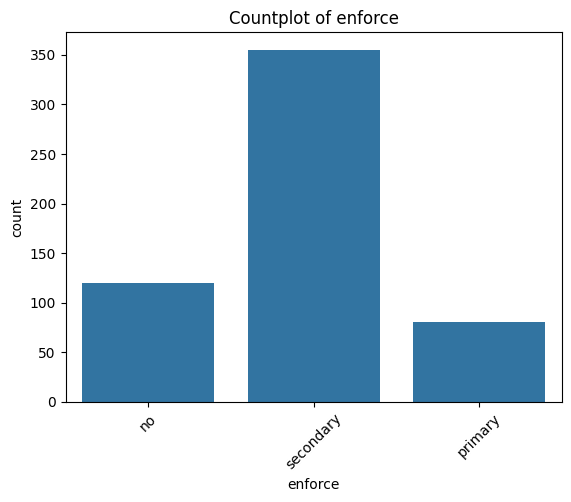

In [7]:
#Step 6 – Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric columns
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Countplot for categorical columns
categorical_cols = df.select_dtypes(exclude='number').columns
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()


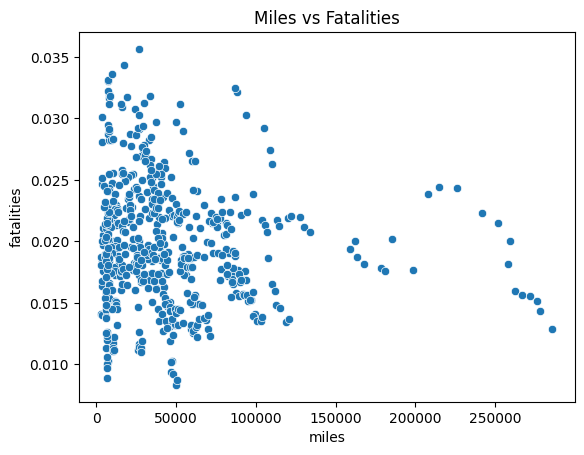

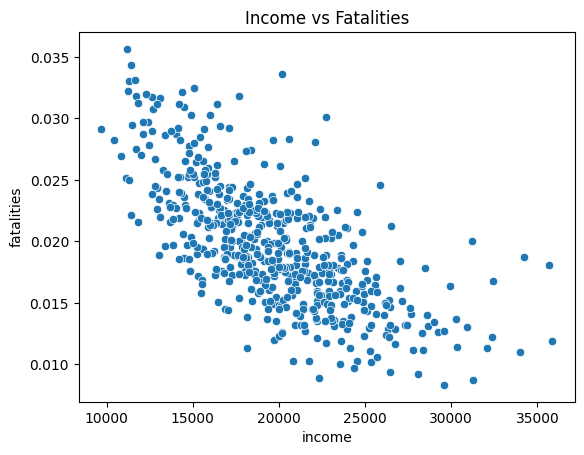

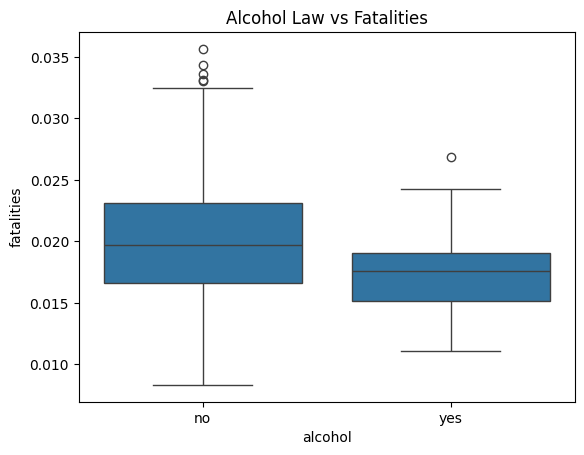

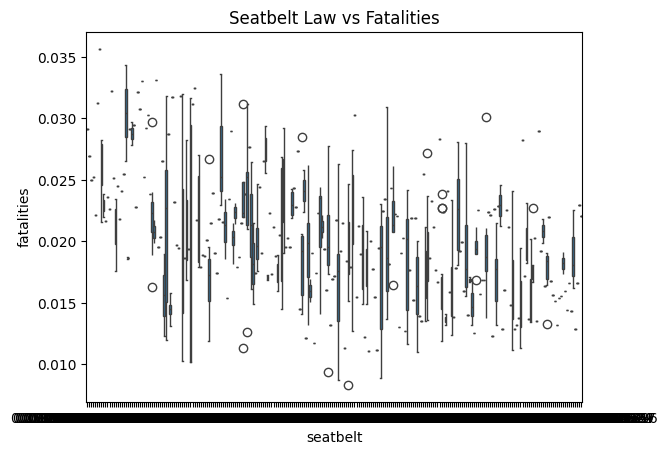

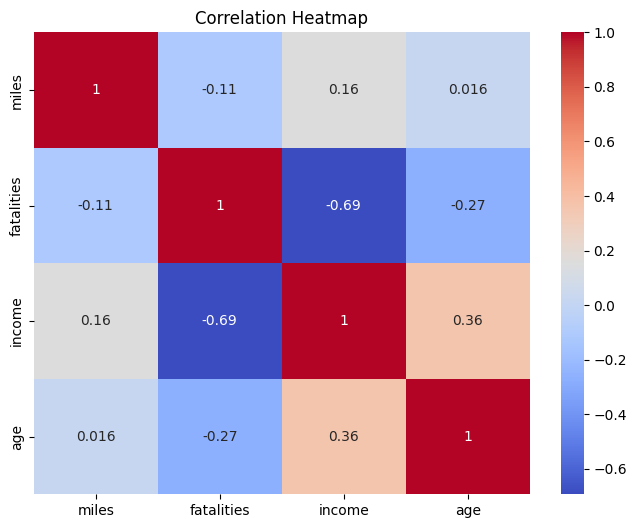

enforce   no  primary  secondary
alcohol                         
no       104       63        314
yes       16       18         41
alcohol   no  yes
seatbelt         
0.060      1    0
0.070      1    0
0.090      1    0
0.099      1    0
0.110      1    0
...       ..  ...
0.850      0    3
0.852      0    1
0.853      1    0
0.860      0    1
0.870      0    1

[245 rows x 2 columns]


In [8]:
#Step 7 – Bivariate Analysis
# Scatterplots
sns.scatterplot(x='miles', y='fatalities', data=df)
plt.title("Miles vs Fatalities")
plt.show()

sns.scatterplot(x='income', y='fatalities', data=df)
plt.title("Income vs Fatalities")
plt.show()

# Boxplots (Categorical vs Numeric)
sns.boxplot(x='alcohol', y='fatalities', data=df)
plt.title("Alcohol Law vs Fatalities")
plt.show()

sns.boxplot(x='seatbelt', y='fatalities', data=df)
plt.title("Seatbelt Law vs Fatalities")
plt.show()

# Correlation Heatmap
numeric_cols = ['miles', 'fatalities', 'income', 'age']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Crosstab Examples
print(pd.crosstab(df['alcohol'], df['enforce']))
print(pd.crosstab(df['seatbelt'], df['alcohol']))


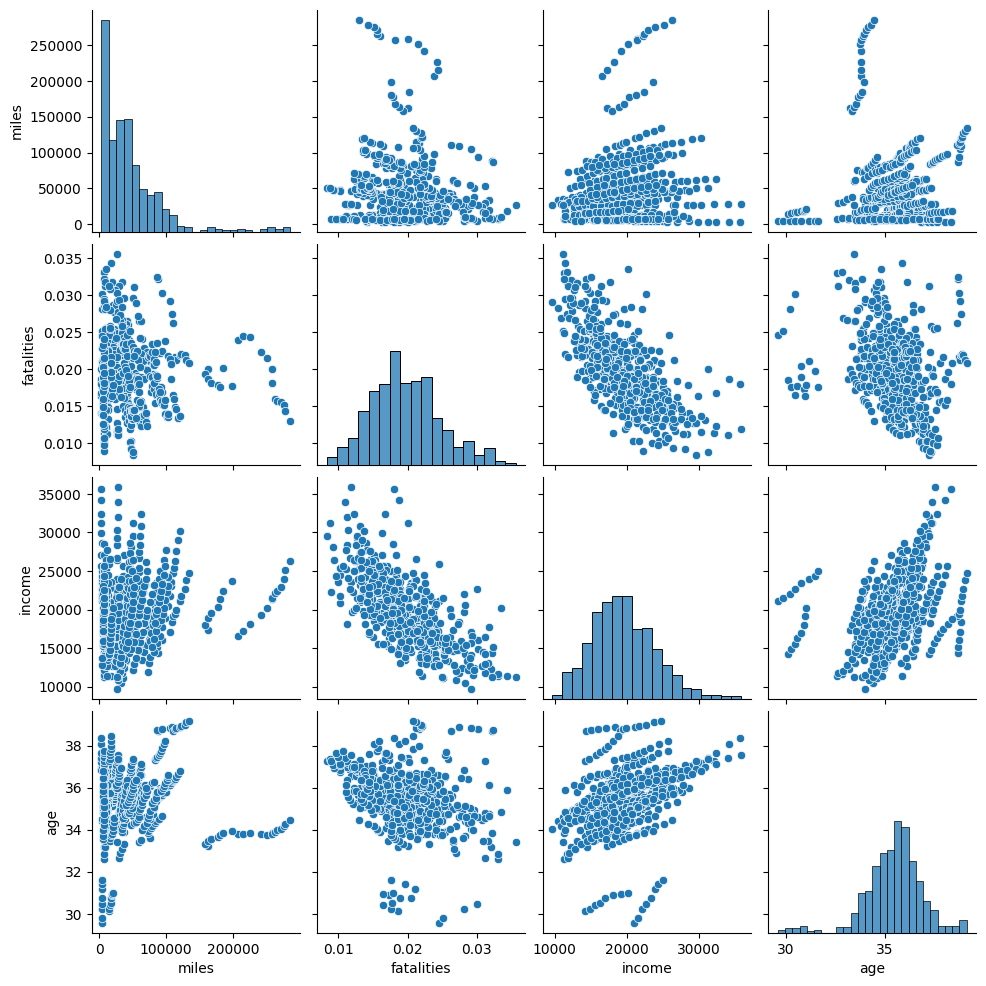

alcohol  enforce  
no       no           0.022431
         primary      0.019148
         secondary    0.019555
yes      no           0.016135
         primary      0.019565
         secondary    0.017112
Name: fatalities, dtype: float64
seatbelt     0.060     0.070     0.090     0.099     0.110     0.120  \
alcohol                                                                
no        0.029118  0.026976  0.024965  0.025214  0.022109  0.031211   
yes            NaN       NaN       NaN       NaN       NaN       NaN   

seatbelt     0.128     0.130     0.150     0.159  ...    0.830     0.831  \
alcohol                                           ...                      
no        0.035649  0.025801  0.022895  0.021653  ...      NaN  0.015993   
yes            NaN       NaN       NaN       NaN  ...  0.01823       NaN   

seatbelt     0.840     0.842     0.845     0.850     0.852     0.853  \
alcohol                                                                
no        0.014411  0.01

In [9]:
#Step 8 – Multivariate Analysis
# Pairplot for numeric columns
sns.pairplot(df[numeric_cols])
plt.show()

# Groupby example
print(df.groupby(['alcohol', 'enforce'])['fatalities'].mean())

# Pivot table
print(pd.pivot_table(df, values='fatalities', index='alcohol', columns='seatbelt', aggfunc='mean'))


In [10]:
#Phase 2 BCSE331L Exploratory Data Analysis TH project

Dataset loaded and cleaned. Starting 1D Analysis...

--- 1D Analysis: Skewness and Kurtosis ---
            Skewness  Kurtosis
miles       2.519186  8.367602
fatalities  0.416344  0.017556
seatbelt   -0.469884 -0.339125
income      0.569836  0.537237
age        -0.777747  2.595411

--- 1D Analysis: Quantiles (Distribution Summary) ---
         miles  fatalities  seatbelt    income        age
0.25   13004.5    0.016217     0.420  16475.75  34.726885
0.50   35143.0    0.019215     0.550  19202.00  35.594189
0.75   59968.0    0.022647     0.650  22320.75  36.274090
0.90   93568.0    0.026496     0.719  25274.00  37.059473
0.95  115978.5    0.029180     0.790  27168.25  37.605438

--- 1D Analysis: Categorical Variable Frequency Distributions ---

Frequency Distribution for 'speed65':
speed65
yes    79.14%
no     20.86%
Name: proportion, dtype: object

Frequency Distribution for 'speed70':
speed70
no     90.29%
yes     9.71%
Name: proportion, dtype: object

Frequency Distribution for 'drink

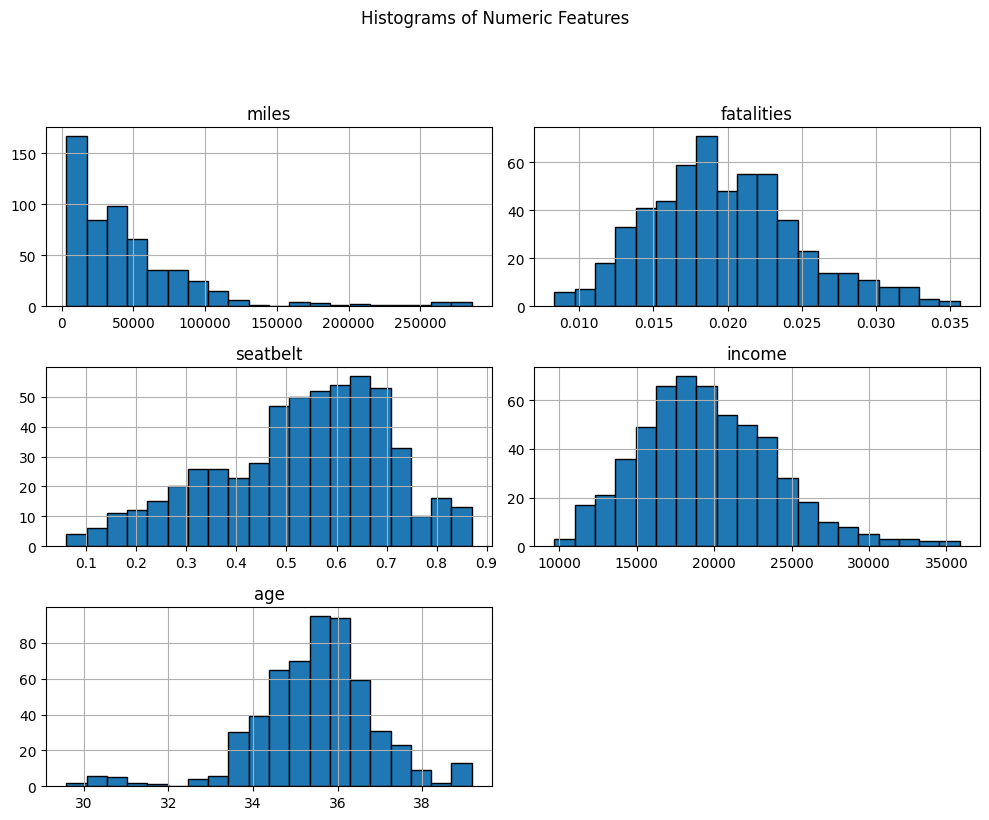

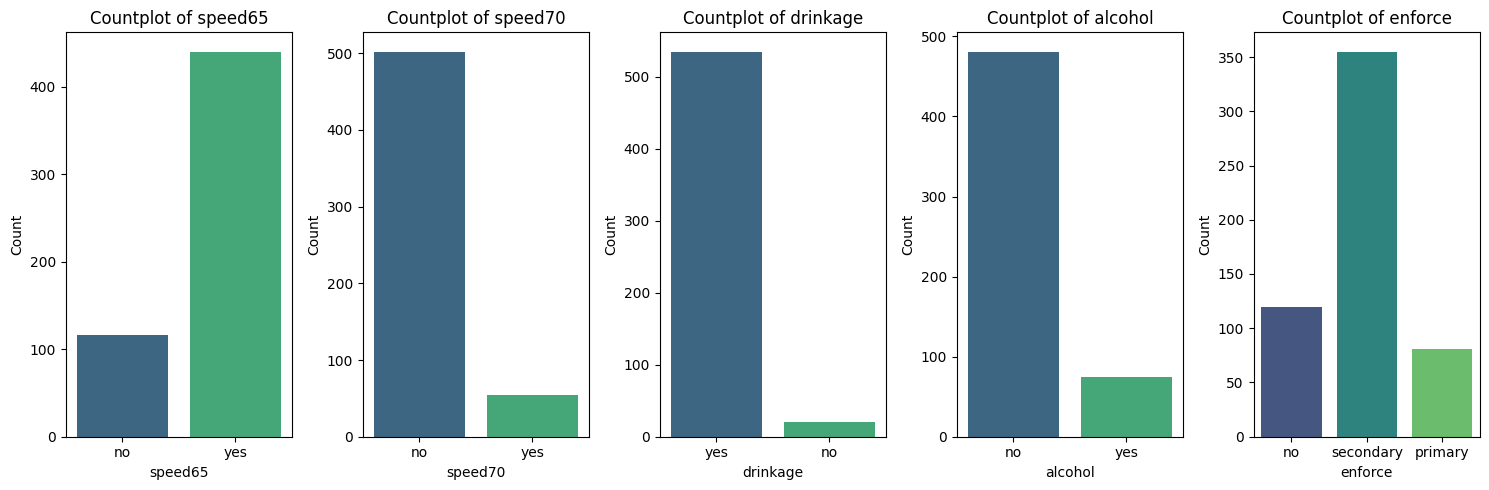

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- PROJECT START: SETUP AND CLEANING ---

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
try:
    df = pd.read_csv(url)
except Exception as e:
    print(f"Error loading data: {e}. Please check the file path or network connection.")


# Drop missing rows in 'seatbelt' (as per your previous cleaning)
df = df.dropna(subset=['seatbelt'])

# Define column groups
numeric_cols = ['miles', 'fatalities', 'seatbelt', 'income', 'age']
categorical_cols = ['speed65', 'speed70', 'drinkage', 'alcohol', 'enforce']

print("Dataset loaded and cleaned. Starting 1D Analysis...\n")


# --- 1D ANALYSIS: SKEWNESS, KURTOSIS, AND QUANTILES ---


print("--- 1D Analysis: Skewness and Kurtosis ---")
skew_kurt = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurt()
})
print(skew_kurt)

print("\n--- 1D Analysis: Quantiles (Distribution Summary) ---")
# Quantiles provide a precise summary of data spread, crucial for assessing non-normal data.
quantiles = df[numeric_cols].quantile([0.25, 0.5, 0.75, 0.90, 0.95])
print(quantiles)


# --- 1D ANALYSIS: FREQUENCY DISTRIBUTIONS ---

print("\n--- 1D Analysis: Categorical Variable Frequency Distributions ---")
for col in categorical_cols:
    print(f"\nFrequency Distribution for '{col}':")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


# --- 1D PLOTTING: HISTOGRAMS AND COUNTPLOTS ---


# 1. Histograms for Numeric Columns
df[numeric_cols].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. Countplots for Categorical Columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 5, i + 1)
    sns.countplot(x=col, data=df, palette='viridis', hue=col, legend=False)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Dataset ready for 2D Analysis...

--- 2D Analysis: Numerical vs. Numerical (Correlation Heatmap) ---


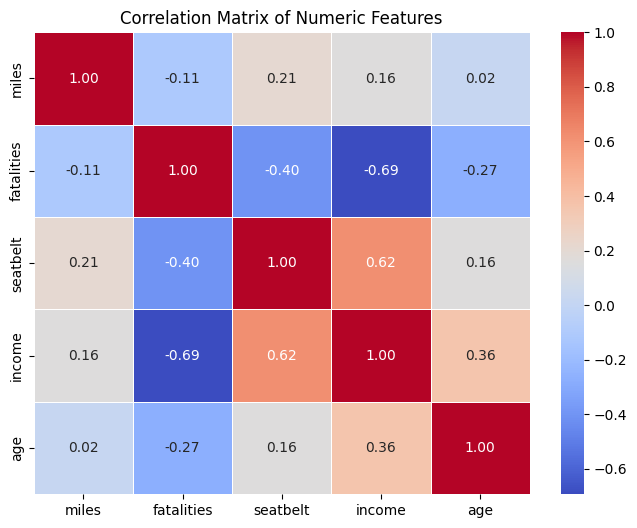


Correlation with Fatalities (Target Variable):
fatalities    1.000000
miles        -0.111337
age          -0.273024
seatbelt     -0.402714
income       -0.692862
Name: fatalities, dtype: float64

--- 2D Analysis: Numerical vs. Categorical (Box Plots) ---


/tmp/ipython-input-197811629.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='enforce', y='fatalities', data=df, palette='Set1')


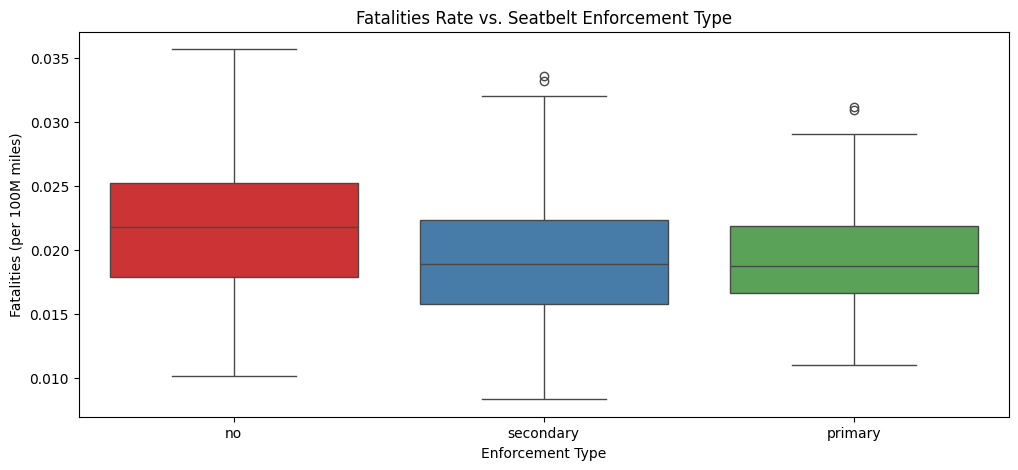

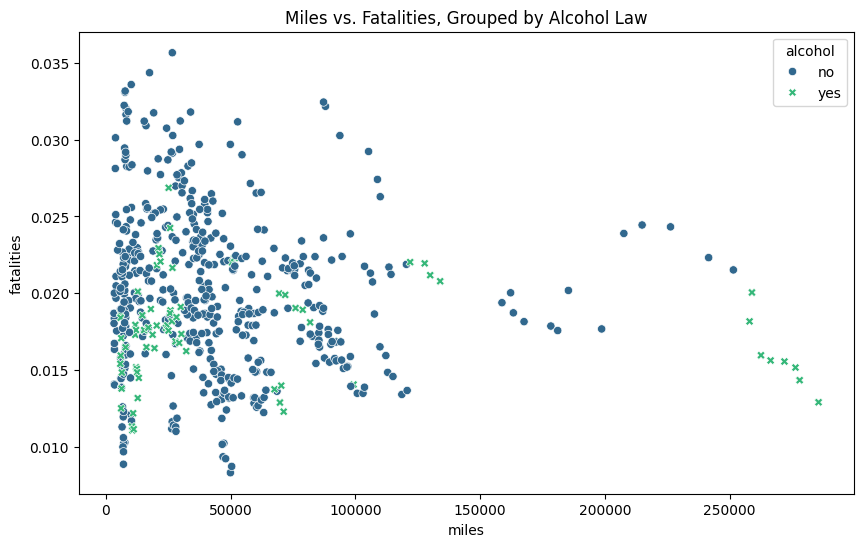


--- 2D Analysis: Categorical vs. Categorical (Contingency Table/Crosstab) ---
Contingency Table (Enforce vs. Alcohol):
alcohol     no  yes  All
enforce                 
no         104   16  120
primary     63   18   81
secondary  314   41  355
All        481   75  556

--- 2D Analysis: Categorical vs. Categorical (Stacked Bar Plot) ---


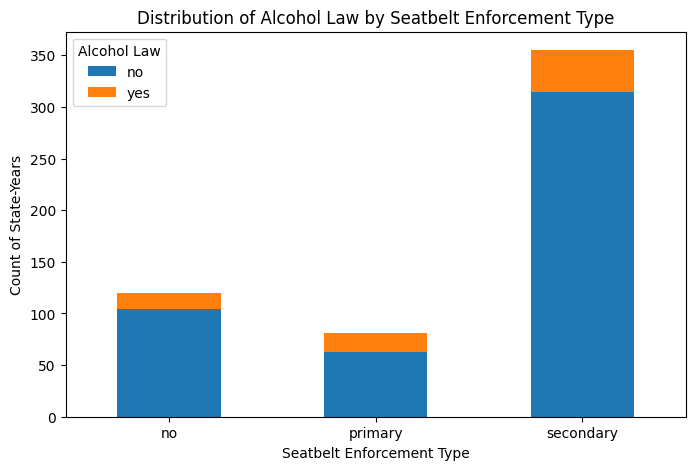

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- PROJECT START: SETUP AND CLEANING ---

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
df = pd.read_csv(url)
df = df.dropna(subset=['seatbelt'])

# Define column groups
numeric_cols = ['miles', 'fatalities', 'seatbelt', 'income', 'age']
categorical_cols = ['speed65', 'speed70', 'drinkage', 'alcohol', 'enforce']
print("Dataset ready for 2D Analysis...\n")


# --- 2D ANALYSIS: NUMERICAL vs NUMERICAL ---

print("--- 2D Analysis: Numerical vs. Numerical (Correlation Heatmap) ---")
plt.figure(figsize=(8, 6))
# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Focus on correlation with the target variable 'fatalities'
print("\nCorrelation with Fatalities (Target Variable):")
print(corr_matrix['fatalities'].sort_values(ascending=False))



# --- 2D ANALYSIS: NUMERICAL vs CATEGORICAL ---


print("\n--- 2D Analysis: Numerical vs. Categorical (Box Plots) ---")
plt.figure(figsize=(12, 5))
sns.boxplot(x='enforce', y='fatalities', data=df, palette='Set1')
plt.title('Fatalities Rate vs. Seatbelt Enforcement Type')
plt.xlabel('Enforcement Type')
plt.ylabel('Fatalities (per 100M miles)')
plt.show()

# Example: Scatter plot of 'miles' vs 'fatalities', colored by 'alcohol' law
plt.figure(figsize=(10, 6))
sns.scatterplot(x='miles', y='fatalities', hue='alcohol', data=df, style='alcohol', palette='viridis')
plt.title('Miles vs. Fatalities, Grouped by Alcohol Law')
plt.show()


# --- 2D ANALYSIS: CATEGORICAL vs CATEGORICAL ---

print("\n--- 2D Analysis: Categorical vs. Categorical (Contingency Table/Crosstab) ---")
crosstab_enforce_alcohol = pd.crosstab(df['enforce'], df['alcohol'], margins=True)
print("Contingency Table (Enforce vs. Alcohol):")
print(crosstab_enforce_alcohol)

print("\n--- 2D Analysis: Categorical vs. Categorical (Stacked Bar Plot) ---")
# Visualize the distribution from the crosstab using a stacked bar plot.
crosstab_enforce_alcohol.iloc[:-1, :-1].plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Distribution of Alcohol Law by Seatbelt Enforcement Type')
plt.xlabel('Seatbelt Enforcement Type')
plt.ylabel('Count of State-Years')
plt.xticks(rotation=0)
plt.legend(title='Alcohol Law')
plt.show()

Dataset ready for 3D Analysis...



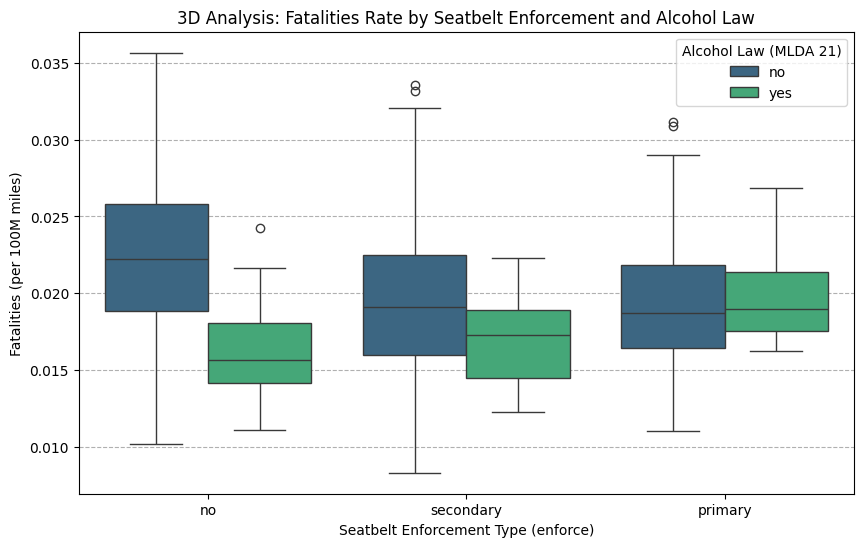

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PROJECT START: SETUP AND CLEANING
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
df = pd.read_csv(url)
df = df.dropna(subset=['seatbelt'])

print("Dataset ready for 3D Analysis...\n")


# --- 3D ANALYSIS: BOX PLOT (NUMERICAL vs CATEGORICAL vs CATEGORICAL) ---


plt.figure(figsize=(10, 6))
sns.boxplot(
    x='enforce',
    y='fatalities',
    hue='alcohol',
    data=df,
    palette='viridis'
)

plt.title('3D Analysis: Fatalities Rate by Seatbelt Enforcement and Alcohol Law')
plt.xlabel('Seatbelt Enforcement Type (enforce)')
plt.ylabel('Fatalities (per 100M miles)')
plt.legend(title='Alcohol Law (MLDA 21)')
plt.grid(axis='y', linestyle='--')
plt.show()



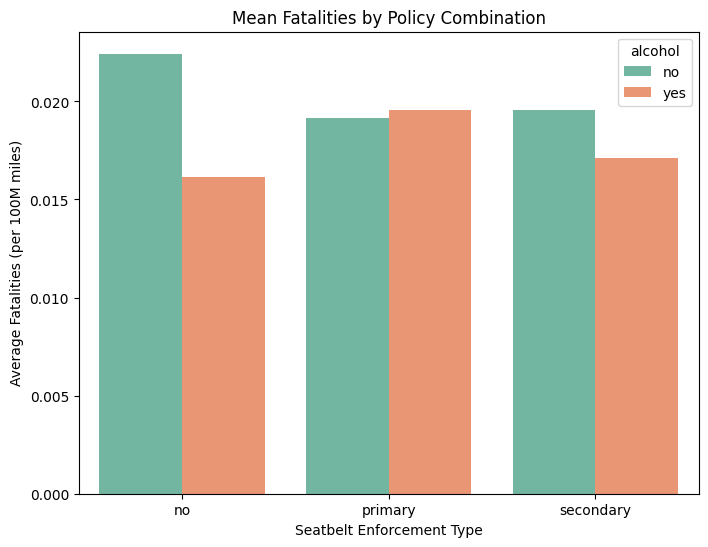

In [14]:
# Calculate the mean fatalities for every combination of enforce and alcohol
mean_fatalities = df.groupby(['enforce', 'alcohol'])['fatalities'].mean().reset_index()

plt.figure(figsize=(8, 6))
# Plot the mean values
sns.barplot(
    x='enforce',
    y='fatalities',
    hue='alcohol',
    data=mean_fatalities,
    palette='Set2'
)
plt.title('Mean Fatalities by Policy Combination')
plt.xlabel('Seatbelt Enforcement Type')
plt.ylabel('Average Fatalities (per 100M miles)')
plt.show()


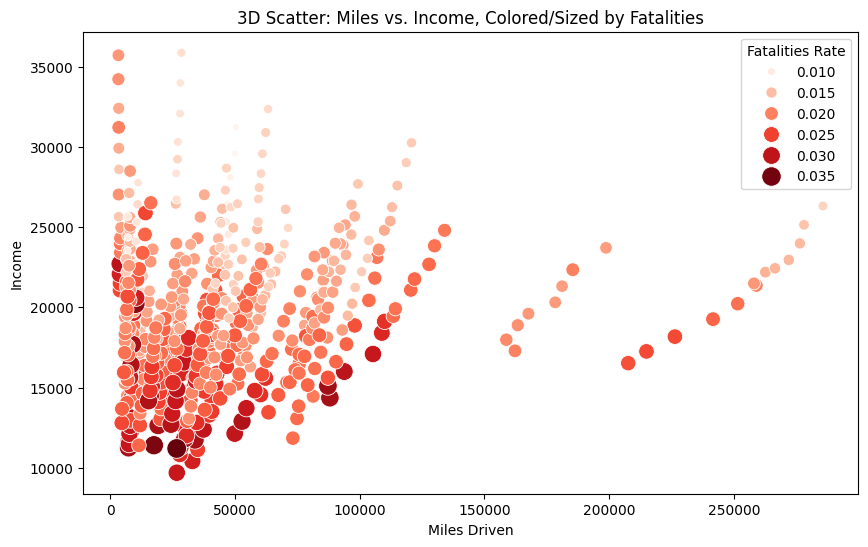

In [15]:
# Visualize 'miles' vs 'income', using 'fatalities' to color the points.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='miles',
    y='income',
    size='fatalities',
    hue='fatalities',
    data=df,
    palette='Reds',
    sizes=(20, 200)
)
plt.title('3D Scatter: Miles vs. Income, Colored/Sized by Fatalities')
plt.xlabel('Miles Driven')
plt.ylabel('Income')
plt.legend(title='Fatalities Rate')
plt.show()

In [17]:
# Phase- 3

Data Preprocessing Complete. Starting Hierarchical Clustering...


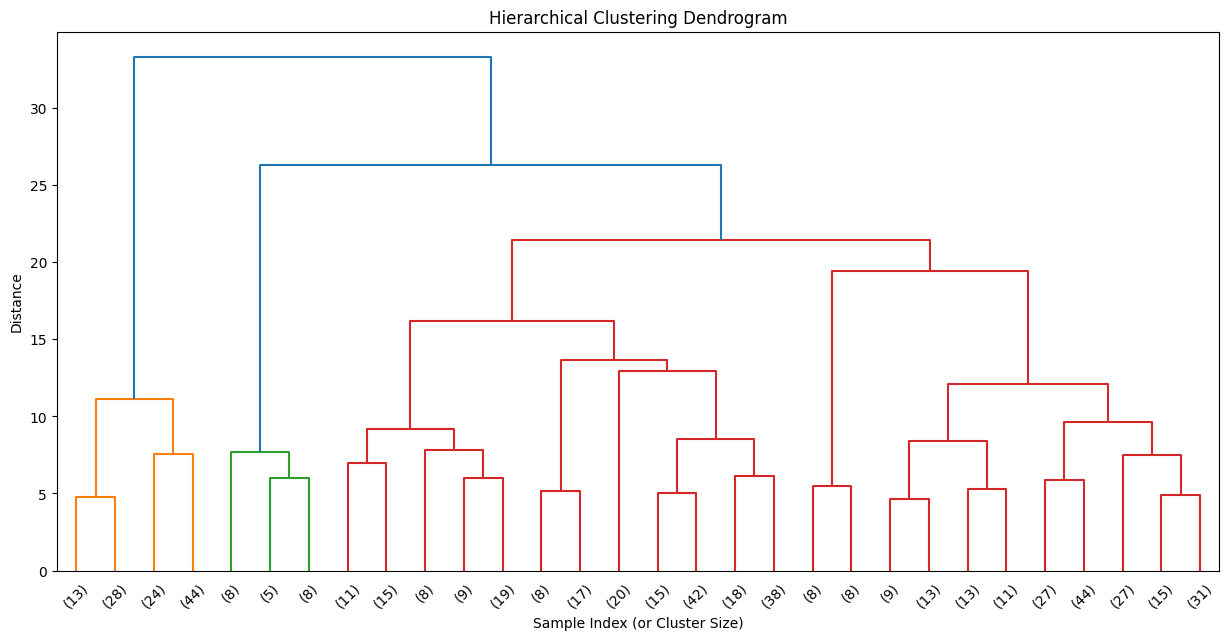


Agglomerative Clustering Results (k=4):
             fatalities          miles        income  seatbelt
Cluster_Agg                                                   
0              0.019961   32348.941748  18908.194175  0.509858
1              0.017473   51945.731818  22607.863636  0.655857
2              0.018758  223578.857143  20893.333333  0.660919
3              0.024233   26270.954128  14445.339450  0.282963


In [18]:
# Module-5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# SETUP AND DATA PREPROCESSING (ESSENTIAL FOR CLUSTERING)
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/USSeatBelts.csv"
try:
    df = pd.read_csv(url)
except Exception as e:
    print("Error loading data. Ensure the URL is accessible.")
    # Exit or handle error if loading fails

df = df.dropna(subset=['seatbelt'])

# 1. Feature Selection: Drop non-predictive/ID columns
df_model = df.drop(columns=['rownames', 'state', 'year'])

# 2. One-Hot Encoding for Categorical Features
categorical_cols = ['speed65', 'speed70', 'drinkage', 'alcohol', 'enforce']
X = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)
X_clust = X.drop(columns=['fatalities'])

# 3. Scaling Numeric Features (CRITICAL for distance-based clustering)
numeric_features_to_scale = ['miles', 'seatbelt', 'income', 'age']
scaler = StandardScaler()
X_clust[numeric_features_to_scale] = scaler.fit_transform(X_clust[numeric_features_to_scale])

print("Data Preprocessing Complete. Starting Hierarchical Clustering...")

# HIERARCHICAL AGGLOMERATIVE CLUSTERING
linked = linkage(X_clust, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           truncate_mode='lastp',
           p=30,
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index (or Cluster Size)')
plt.ylabel('Distance')
plt.show()


n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels_agg = agg_clustering.fit_predict(X_clust)

df_model['Cluster_Agg'] = cluster_labels_agg
agg_analysis = df_model.groupby('Cluster_Agg')[['fatalities', 'miles', 'income', 'seatbelt']].mean()

print(f"\nAgglomerative Clustering Results (k={n_clusters}):")
print(agg_analysis)

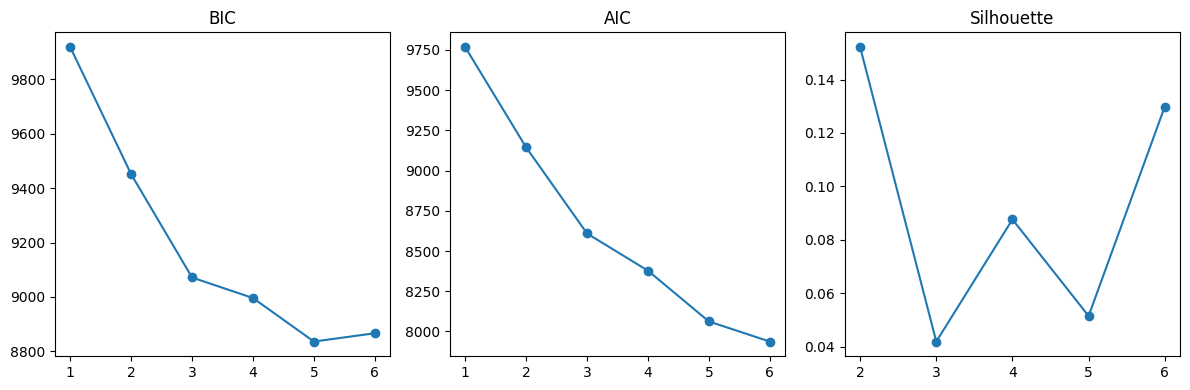

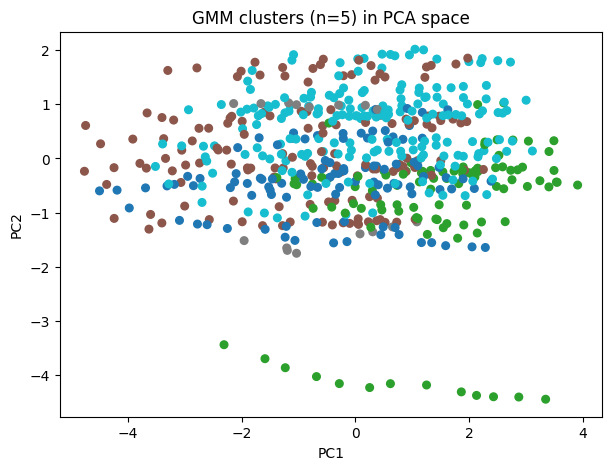

In [19]:
# Gaussian Mixture (EM) clustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Choose numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols].dropna()

# scale
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
pca = PCA(n_components=2, random_state=0)
X2 = pca.fit_transform(Xs)

# find best n_components via BIC/AIC and silhouette
bic_vals, aic_vals, sil_vals = [], [], []
n_range = range(1,7)

for n in n_range:
    g = GaussianMixture(n_components=n, random_state=0, covariance_type='full')
    g.fit(Xs)
    labels = g.predict(Xs)
    bic_vals.append(g.bic(Xs))
    aic_vals.append(g.aic(Xs))
    sil = silhouette_score(Xs, labels) if n>1 else np.nan
    sil_vals.append(sil)

# plot BIC/AIC and silhouette
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(n_range, bic_vals, marker='o'); plt.title("BIC")
plt.subplot(1,3,2)
plt.plot(n_range, aic_vals, marker='o'); plt.title("AIC")
plt.subplot(1,3,3)
plt.plot(n_range, sil_vals, marker='o'); plt.title("Silhouette")
plt.tight_layout()
plt.show()

# Fit chosen model (example: best BIC)
best_n = n_range[np.argmin(bic_vals)]
gbest = GaussianMixture(n_components=best_n, random_state=0)
gbest.fit(Xs)
labels_gmm = gbest.predict(Xs)
probs = gbest.predict_proba(Xs)  # soft assignments

# plot clusters in PCA space
plt.figure(figsize=(7,5))
plt.scatter(X2[:,0], X2[:,1], c=labels_gmm, s=30, cmap='tab10')
plt.title(f'GMM clusters (n={best_n}) in PCA space')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()
cluster_series = pd.Series(labels_gmm, index=X.index, name='gmm_cluster')
df = df.join(cluster_series)


GMM outliers (count): 2
DBSCAN outliers: 369


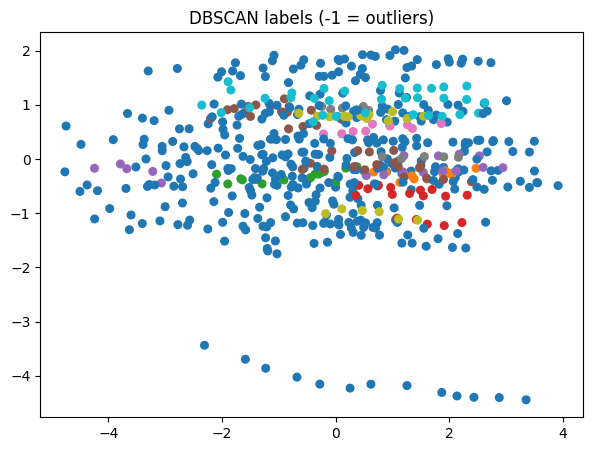

In [20]:
# Outlier detection using GMM posterior probabilities
max_prob = probs.max(axis=1)
outlier_mask_gmm = max_prob < 0.5  # threshold - tweak as needed
print("GMM outliers (count):", outlier_mask_gmm.sum())

df.loc[X.index[outlier_mask_gmm], numeric_cols].head()

# DBSCAN-based outliers
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.8, min_samples=5)
db_labels = db.fit_predict(Xs)
outliers_db = (db_labels == -1).sum()
print("DBSCAN outliers:", outliers_db)

# attach DBSCAN label
df.loc[X.index, 'dbscan_label'] = db_labels

# Visualize outliers in PCA space
plt.figure(figsize=(7,5))
plt.scatter(X2[:,0], X2[:,1], c=db_labels, cmap='tab10', s=30)
plt.title('DBSCAN labels (-1 = outliers)')
plt.show()


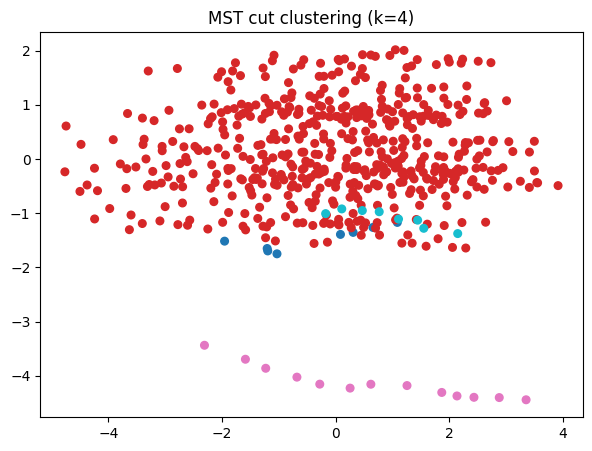

In [21]:
# Minimun Spanning Tree clustering
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
from scipy.sparse.csgraph import minimum_spanning_tree

# use Xs (scaled numeric matrix) and keep indices
Dcond = pdist(Xs, metric='euclidean')
D = squareform(Dcond)

# compute MST as sparse matrix
mst_sparse = minimum_spanning_tree(D)
mst = mst_sparse.toarray().astype(float)

# build networkx graph for visualization
G = nx.Graph()
n = Xs.shape[0]
for i in range(n):
    G.add_node(i)
rows, cols = np.where(mst > 0)
for r,c in zip(rows, cols):
    G.add_edge(r, c, weight=mst[r,c])

# To get clusters: cut top (k-1) largest edges
k = n_clusters
edges_sorted = sorted(G.edges(data=True), key=lambda e: e[2]['weight'], reverse=True)
Gcut = G.copy()
# remove (k-1) largest edges
for i_e in range(k-1):
    u,v,_ = edges_sorted[i_e]
    Gcut.remove_edge(u, v)

# connected components are clusters
components = list(nx.connected_components(Gcut))
labels_mst = np.zeros(n, dtype=int)
for i_comp, comp in enumerate(components):
    for node in comp:
        labels_mst[node] = i_comp

# map back to original index and attach
df.loc[X.index, 'mst_cluster'] = labels_mst

# visualize clusters in PCA
plt.figure(figsize=(7,5))
plt.scatter(X2[:,0], X2[:,1], c=labels_mst, s=30, cmap='tab10')
plt.title(f'MST cut clustering (k={k})')
plt.show()


In [22]:
# Module-6
# Common setup: numeric data + scaling + 2D PCA for plotting
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# choose numeric columns automatically
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols].dropna()
idx = X.index
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# 2D PCA projection used later for consistent plotting
pca2 = PCA(n_components=2, random_state=0)
X2 = pca2.fit_transform(Xs)


Explained variance (first components): [0.30340047 0.18269903 0.1657787  0.09873534 0.07507156 0.05839473
 0.0444436  0.03152318 0.02220886 0.01774452]
Cumulative explained: [0.30340047 0.4860995  0.6518782  0.75061354 0.8256851  0.88407983
 0.92852343 0.96004661 0.98225548 1.        ]


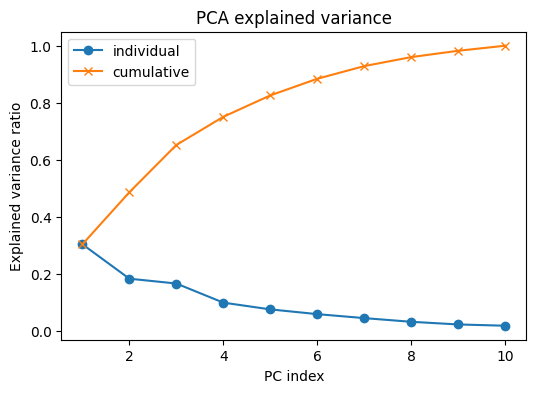

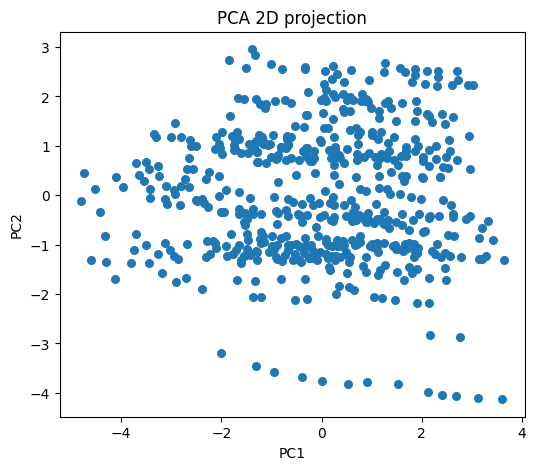

Reconstruction MSE for k=1..: [np.float64(0.6965995254473429), np.float64(0.5139004996555011), np.float64(0.3481217993884341), np.float64(0.24938646154768723), np.float64(0.17431489860319416), np.float64(0.11592017015310885), np.float64(0.07147657083276356), np.float64(0.03995338637494037), np.float64(0.017744521673065405), np.float64(6.292790302179044e-31)]


In [23]:
# PCA: explained variance, components, transform/reconstruct
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=min(10, Xs.shape[1]), random_state=0)
pca.fit(Xs)

explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

print("Explained variance (first components):", explained)
print("Cumulative explained:", cum_explained)

# plot explained variance
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained)+1), explained, marker='o', label='individual')
plt.plot(range(1, len(explained)+1), cum_explained, marker='x', label='cumulative')
plt.xlabel('PC index'); plt.ylabel('Explained variance ratio'); plt.legend()
plt.title('PCA explained variance')
plt.show()

# Project to 2D and plot
X_pca = pca2.transform(Xs)
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=30)
plt.title('PCA 2D projection')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

# Reconstruction error for k PCs
def recon_error_for_k(k):
    p = PCA(n_components=k, random_state=0).fit(Xs)
    Xrec = p.inverse_transform(p.transform(Xs))
    return np.mean(np.square(Xs - Xrec))
errors = [recon_error_for_k(k) for k in range(1, min(11, Xs.shape[1]+1))]
print("Reconstruction MSE for k=1..:", errors)


In [24]:
# SVD demo: show relation to PCA and low-rank approximation
import numpy as np

# center data (PCA assumes centered)
Xc = Xs - Xs.mean(axis=0)
U, S, VT = np.linalg.svd(Xc, full_matrices=False)

# singular values and variance explained relation
sing_vals = S
variance_from_s = (S**2) / (Xs.shape[0] - 1)
cum = np.cumsum(variance_from_s) / np.sum(variance_from_s)
print("Singular values (first 10):", sing_vals[:10])
print("Cumulative variance (via SVD):", cum[:10])

# low-rank reconstruction using r singular values
def svd_reconstruct(r):
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    VTr = VT[:r, :]
    Xr = Ur.dot(Sr).dot(VTr)
    return Xr

# show reconstruction MSE for r=1..5
mse_svd = [np.mean((Xc - svd_reconstruct(r))**2) for r in range(1, min(6, Xc.shape[1]+1))]
print("SVD recon MSE (r=1..):", mse_svd)


Singular values (first 10): [41.07196901 31.87172075 30.35999956 23.43007636 20.43031791 18.01873165
 15.7196187  13.23891633 11.11221345  9.9327509 ]
Cumulative variance (via SVD): [0.30340047 0.4860995  0.6518782  0.75061354 0.8256851  0.88407983
 0.92852343 0.96004661 0.98225548 1.        ]
SVD recon MSE (r=1..): [np.float64(0.6965995254473429), np.float64(0.513900499655501), np.float64(0.3481217993884341), np.float64(0.24938646154768723), np.float64(0.17431489860319416)]


In [25]:
# Intrinsic dimensionality estimation
import numpy as np
from sklearn.neighbors import NearestNeighbors

# 1) PCA-based: smallest k such that cumulative explained >= threshold
pca_full = PCA(n_components=min(Xs.shape[1], Xs.shape[0]-1), random_state=0).fit(Xs)
cum = np.cumsum(pca_full.explained_variance_ratio_)
threshold = 0.95
k_pca = np.searchsorted(cum, threshold) + 1
print(f"PCA-based intrinsic dim (>= {threshold*100:.0f}% var): {k_pca}")

# 2) Levina & Bickel MLE intrinsic dim estimator
def levina_bickel_id(X, k=10):
    n, d = X.shape
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
    distances, _ = nbrs.kneighbors(X)
    distances = distances[:, 1:]
    logs = np.log(distances[:, -1][:, None] / distances[:, :-1])
    inv_local = (np.sum(logs, axis=1) / (k - 1))
    inv_local = np.maximum(inv_local, 1e-12)
    mle = np.mean(1.0 / inv_local)
    return mle

id_mle = levina_bickel_id(Xs, k=10)
print("Levina-Bickel MLE intrinsic dim (k=10):", id_mle)


PCA-based intrinsic dim (>= 95% var): 8
Levina-Bickel MLE intrinsic dim (k=10): 2.990679014527093


Factor loadings shape: (5, 10)


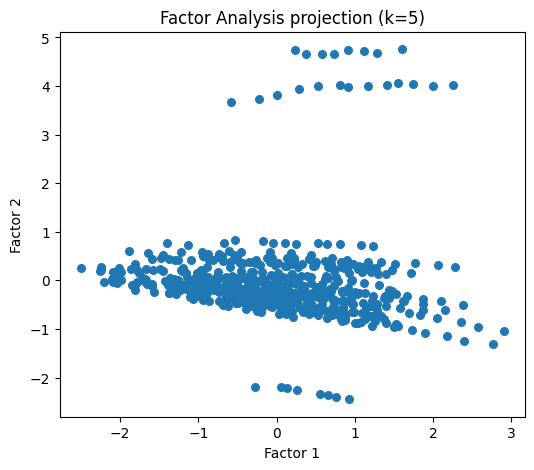

In [26]:
# Factor Analysis
from sklearn.decomposition import FactorAnalysis

# choose number of latent factors
k_factors = min(5, k_pca)
fa = FactorAnalysis(n_components=k_factors, random_state=0)
Z = fa.fit_transform(Xs)

print("Factor loadings shape:", fa.components_.shape)
# plot first two factors
plt.figure(figsize=(6,5))
plt.scatter(Z[:,0], Z[:,1], s=30)
plt.title(f'Factor Analysis projection (k={k_factors})')
plt.xlabel('Factor 1'); plt.ylabel('Factor 2')
plt.show()
for i in range(k_factors):
    df.loc[idx, f'FA_{i+1}'] = Z[:, i]


  Preparing metadata (setup.py) ... done


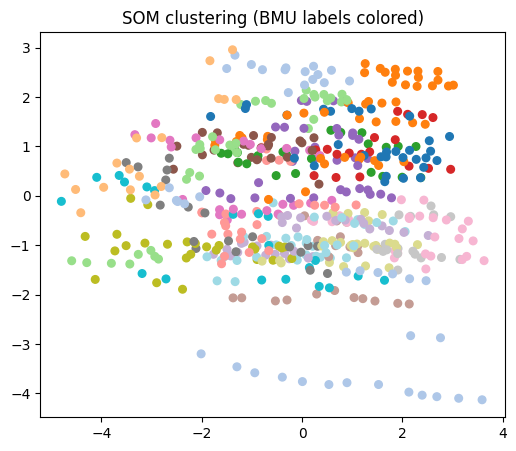

In [27]:
# Self-Organizing Map (SOM) using MiniSom
!pip install minisom --quiet

from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# smaller sample for SOM speed/clarity
Xs_som = Xs[:2000] if Xs.shape[0] > 2000 else Xs
n_rows, n_cols = 10, 10
som = MiniSom(n_rows, n_cols, Xs_som.shape[1], sigma=1.0, learning_rate=0.5, random_seed=0)
som.random_weights_init(Xs_som)
som.train_random(Xs_som, 1000)

# map each sample to its BMU
bmus = np.array([som.winner(x) for x in Xs_som])
labels_1d = bmus[:,0] * n_cols + bmus[:,1]

plt.figure(figsize=(6,5))
plt.scatter(X2[:Xs_som.shape[0],0], X2[:Xs_som.shape[0],1], c=labels_1d, s=30, cmap='tab20')
plt.title('SOM clustering (BMU labels colored)')
plt.show()


In [28]:
# Module -7
# Linear Regression Model Construction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Example: using numeric data from df
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols].dropna()
# Choose a target (update as per your dataset)
target = numeric_cols[-1]
y = X[target]
X = X.drop(columns=[target])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Coefficients
print("Intercept:", lr.intercept_)
print("Coefficients:", pd.Series(lr.coef_, index=X.columns))


Intercept: -104.07525944530086
Coefficients: rownames       -0.000376
year            0.051903
miles          -0.000034
fatalities      0.002167
seatbelt       -0.209051
income          0.000104
age             0.007890
gmm_cluster    -0.266757
dbscan_label   -0.011231
mst_cluster     0.766944
FA_1           -0.170752
FA_2            1.238097
FA_3            0.361459
FA_4           -0.434743
dtype: float64


R² score: 1.0000
MAE: 0.0000
RMSE: 0.0000


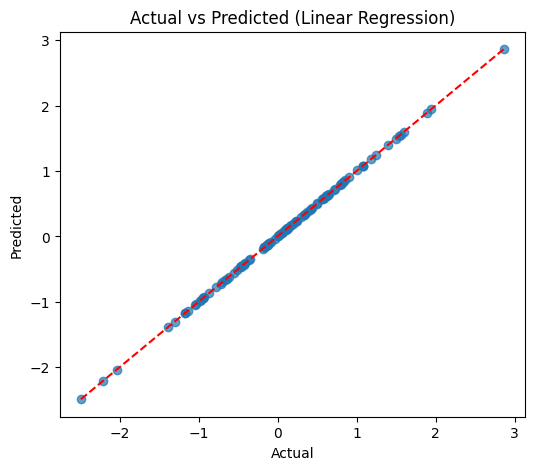

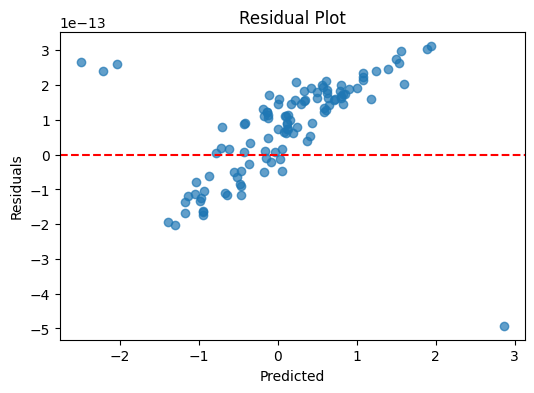

In [29]:
# Model Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [30]:
# Cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
print("Cross-validated R² scores:", scores)
print("Mean R²:", np.mean(scores))


Cross-validated R² scores: [1. 1. 1. 1. 1.]
Mean R²: 1.0


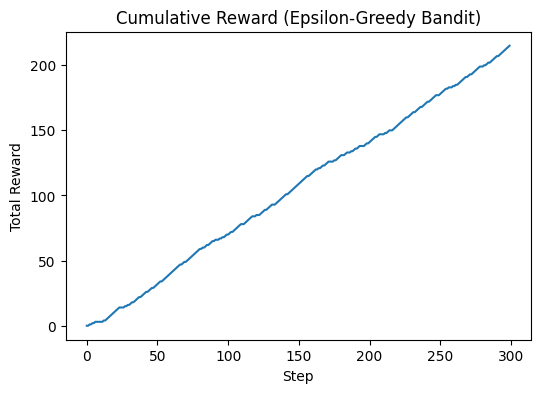

Estimated Q-values: [0.2        0.41666667 0.77946768]
True means: [0.2, 0.5, 0.8]


In [31]:
# Reinforcement Learning
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# define bandit arms with different reward probabilities
true_means = [0.2, 0.5, 0.8]
n_arms = len(true_means)
n_steps = 300

# epsilon-greedy parameters
epsilon = 0.1
Q = np.zeros(n_arms)
N = np.zeros(n_arms)
rewards = []

for t in range(n_steps):
    if np.random.rand() < epsilon:
        action = np.random.choice(n_arms)
    else:
        action = np.argmax(Q)

    reward = np.random.rand() < true_means[action]
    N[action] += 1
    Q[action] += (reward - Q[action]) / N[action]
    rewards.append(reward)

# cumulative reward plot
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(rewards))
plt.title("Cumulative Reward (Epsilon-Greedy Bandit)")
plt.xlabel("Step"); plt.ylabel("Total Reward")
plt.show()
print("Estimated Q-values:", Q)
print("True means:", true_means)
